<a href="https://colab.research.google.com/github/gentomacine/datascience_wrexham/blob/main/diabetis(machine_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


# Load the Diabetes dataset
diabetes_df = pd.read_csv('diabetes_dataset.csv')

diabetes_df.head(20)

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
5,5,40,Female,Asian,33.6,96.1,75.0,13.5,170,90,...,44.5,190.0,77.5,6.4,Low,3460,NaN,Never,1,1
6,6,58,Male,Black,33.2,100.0,97.7,13.3,131,80,...,77.9,73.4,52.1,4.7,High,3107,Moderate,Never,0,0
7,7,38,Female,Hispanic,26.9,105.0,80.2,10.9,121,83,...,69.7,122.2,72.0,5.6,Moderate,2390,Heavy,Current,0,1
8,8,42,Male,White,27.0,115.4,83.9,7.0,132,118,...,73.2,97.4,76.4,6.2,Low,3844,NaN,Former,1,0
9,9,30,Male,White,24.0,74.6,72.0,14.0,146,83,...,53.3,170.7,14.5,6.9,High,2230,Moderate,Former,1,0


In [ ]:
# Select the desired columns
selected_columns = ['BMI','GGT','Fasting_Blood_Glucose','Previous_Gestational_Diabetes','HbA1c','Age']
df_selected = diabetes_df[selected_columns]

# Display the first few rows of the selected data
df_selected.head(20)

,BMI,GGT,Fasting_Blood_Glucose,Previous_Gestational_Diabetes,HbA1c,Age
0,35.8,37.5,123.9,1,10.9,58
1,24.1,88.5,183.7,1,12.8,48
2,25.0,56.2,142.0,0,14.5,34
3,32.7,34.4,167.4,0,8.8,62
4,33.5,81.9,146.4,0,7.1,27
5,33.6,77.5,75.0,1,13.5,40
6,33.2,52.1,97.7,0,13.3,58
7,26.9,72.0,80.2,1,10.9,38
8,27.0,76.4,83.9,0,7.0,42
9,24.0,14.5,72.0,0,14.0,30


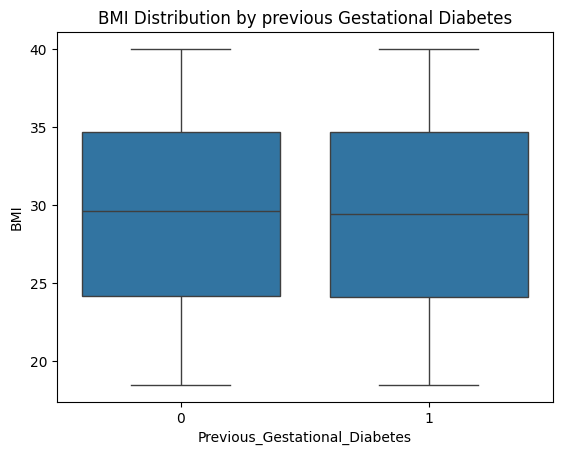

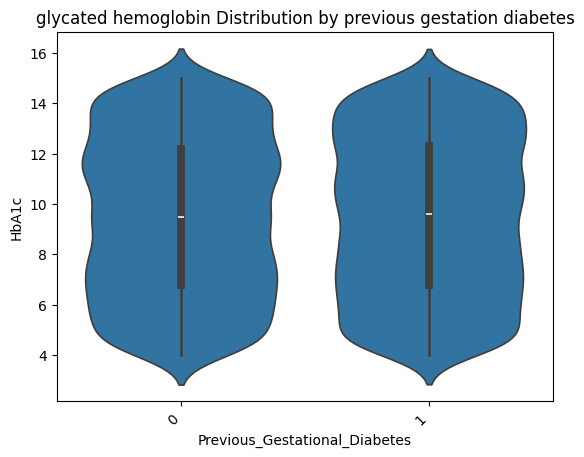

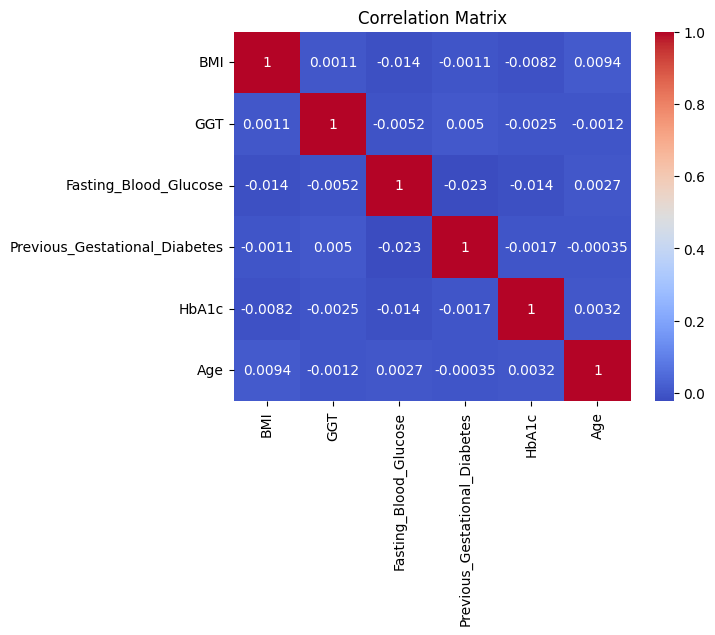

In [ ]:
#BMI distribution by Diabetes status
sns.boxplot(x="Previous_Gestational_Diabetes", y="BMI", data=df_selected)
plt.title("BMI Distribution by previous Gestational Diabetes")
plt.show()

#glycated hemoglobin (HbA1c) distribution by Ethnicity
sns.violinplot(x="Previous_Gestational_Diabetes", y="HbA1c", data=df_selected)
plt.title("glycated hemoglobin Distribution by previous gestation diabetes")
plt.xticks(rotation=45, ha="right")
plt.show()

# Strip whitespace from column names
df_selected.columns = df_selected.columns.str.strip()


# Select only numeric columns
numeric_df = df_selected.select_dtypes(include=['number'])

# Plot correlation heatmap
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

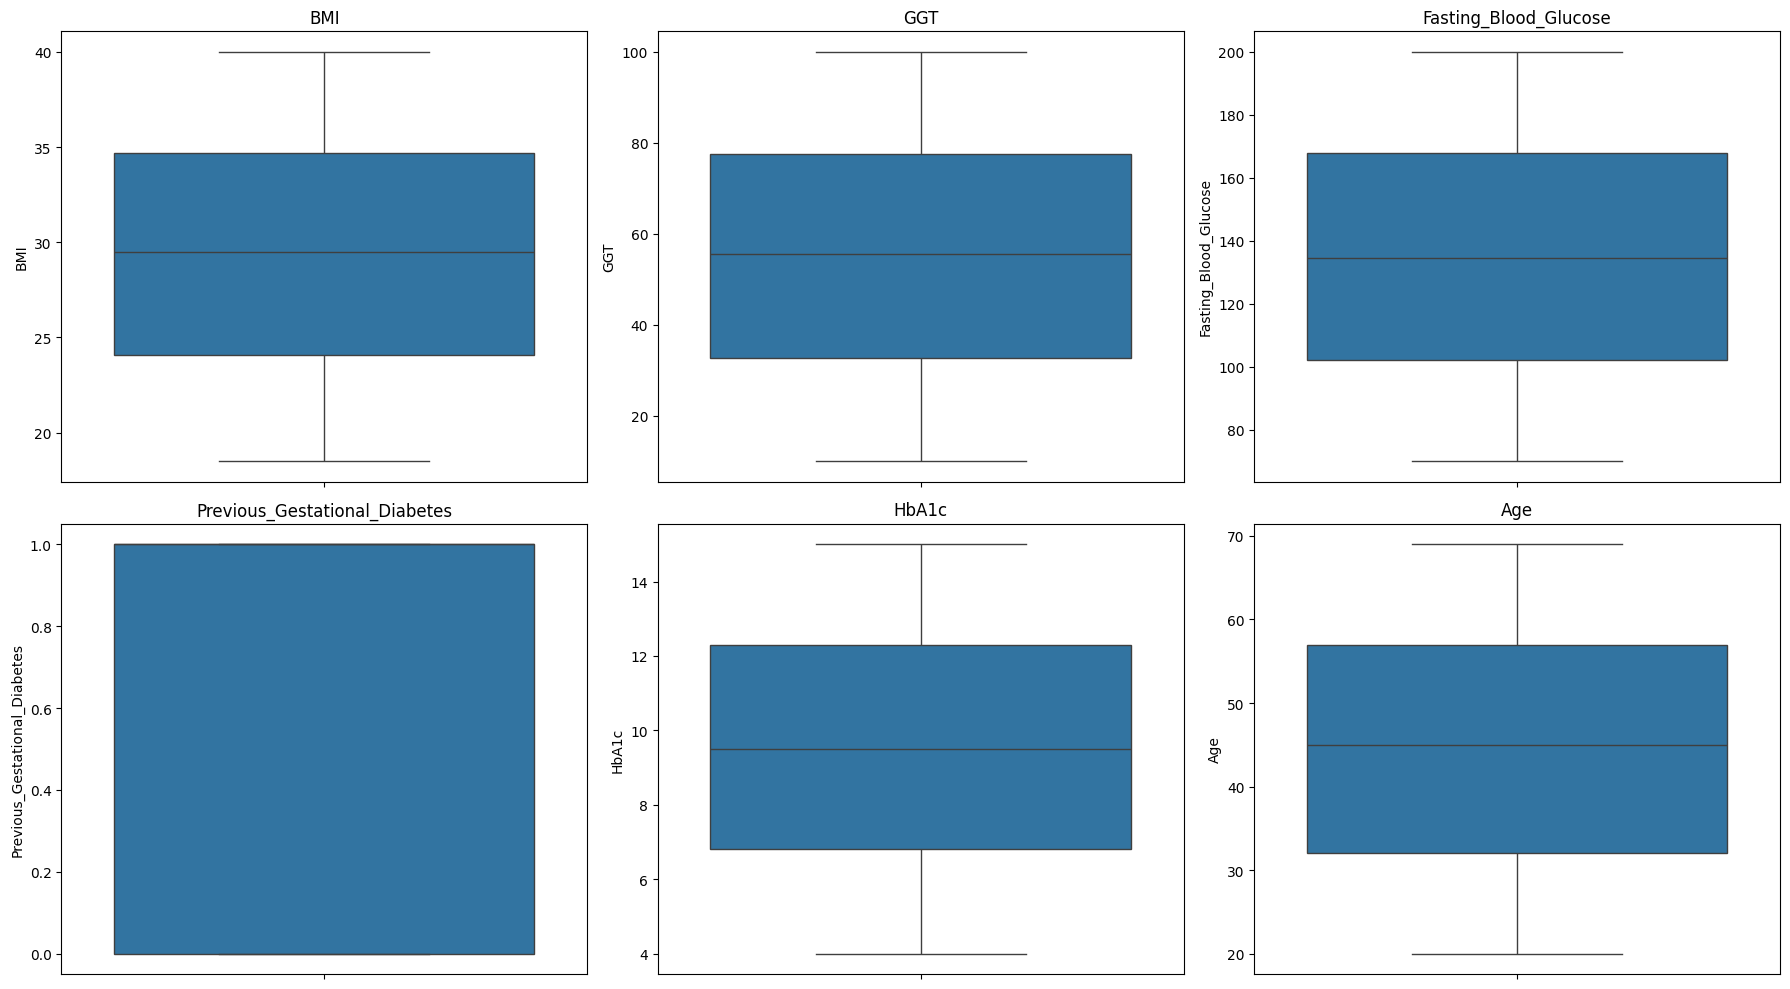

In [ ]:

# Get list of numeric columns
numeric_cols = df_selected.select_dtypes(include=np.number).columns.tolist()

# Now define num_cols
num_cols = len(numeric_cols)
cols_per_row = 3
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(6 * cols_per_row, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_selected[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any empty plots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
y = df_selected['Previous_Gestational_Diabetes']
X = df_selected.drop('Previous_Gestational_Diabetes', axis=1)

df_selected.head(20)



,BMI,GGT,Fasting_Blood_Glucose,Previous_Gestational_Diabetes,HbA1c,Age
0,35.8,37.5,123.9,1,10.9,58
1,24.1,88.5,183.7,1,12.8,48
2,25.0,56.2,142.0,0,14.5,34
3,32.7,34.4,167.4,0,8.8,62
4,33.5,81.9,146.4,0,7.1,27
5,33.6,77.5,75.0,1,13.5,40
6,33.2,52.1,97.7,0,13.3,58
7,26.9,72.0,80.2,1,10.9,38
8,27.0,76.4,83.9,0,7.0,42
9,24.0,14.5,72.0,0,14.0,30


In [ ]:
# Split data in to 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Train classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier with hyperparameters
dtc = DecisionTreeClassifier(
    criterion='gini',      # or 'entropy'
    max_depth=5,           # limit depth to prevent overfitting
    min_samples_split=4,   # minimum samples to split a node
    random_state=42
)

# Train the Decision Tree model
dtc.fit(X_train, y_train)

# Random Forest Classifier with hyperparameters
rfc = RandomForestClassifier(
    n_estimators=100,      # number of trees in the forest
    max_depth=8,           # maximum depth of trees
    max_features='sqrt',   # number of features to consider at each split
    random_state=42
)
# Train the Random Forest model
rfc.fit(X_train, y_train)

# Predict
y_pred_dtc = dtc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

# Evaluate
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Report:\n", classification_report(y_test, y_pred_dtc))

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("Report:\n", classification_report(y_test, y_pred_rfc))



Decision Tree Classifier
Accuracy: 0.515
Confusion Matrix:
 [[303 640]
 [330 727]]
Report:
               precision    recall  f1-score   support

           0       0.48      0.32      0.38       943
           1       0.53      0.69      0.60      1057

    accuracy                           0.52      2000
   macro avg       0.51      0.50      0.49      2000
weighted avg       0.51      0.52      0.50      2000


Random Forest Classifier
Accuracy: 0.522
Confusion Matrix:
 [[305 638]
 [318 739]]
Report:
               precision    recall  f1-score   support

           0       0.49      0.32      0.39       943
           1       0.54      0.70      0.61      1057

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.52      0.50      2000



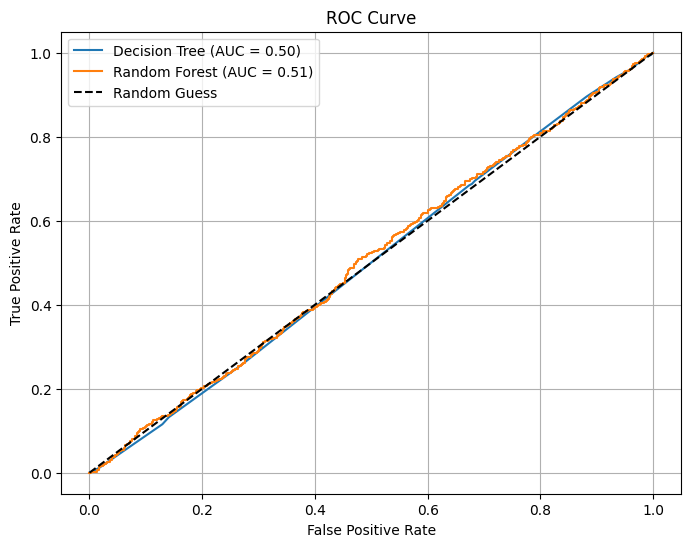

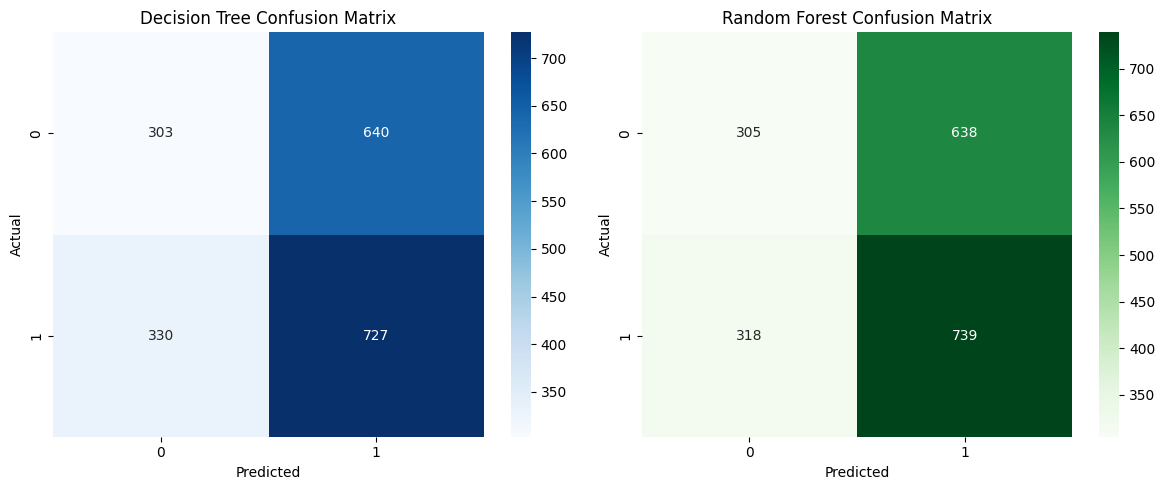

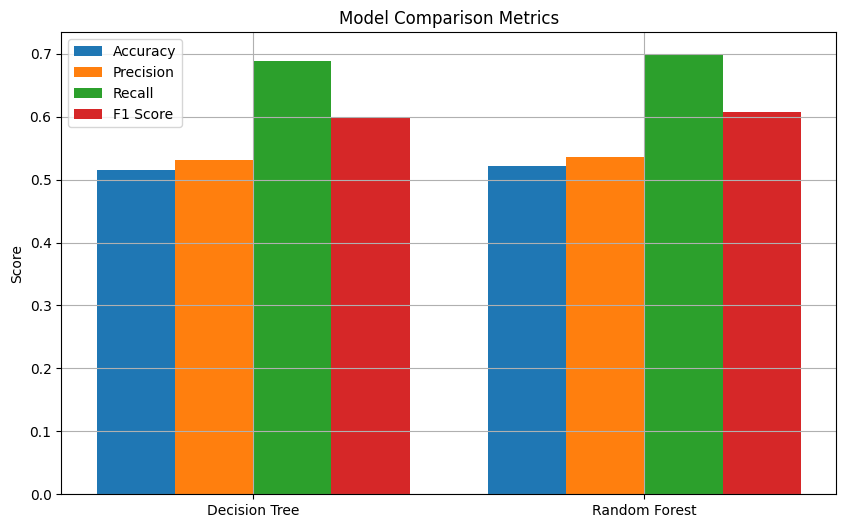

In [ ]:

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities for ROC curve
y_proba_dtc = dtc.predict_proba(X_test)[:, 1]
y_proba_rfc = rfc.predict_proba(X_test)[:, 1]

# ROC Curves
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_proba_dtc)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_proba_rfc)
auc_dtc = auc(fpr_dtc, tpr_dtc)
auc_rfc = auc(fpr_rfc, tpr_rfc)

# === PLOT ROC CURVES ===
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtc, tpr_dtc, label=f"Decision Tree (AUC = {auc_dtc:.2f})")
plt.plot(fpr_rfc, tpr_rfc, label=f"Random Forest (AUC = {auc_rfc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# === CONFUSION MATRICES ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# === COMPARE METRICS (Bar Plot) ===
models = ['Decision Tree', 'Random Forest']
accuracy = [
    accuracy_score(y_test, y_pred_dtc),
    accuracy_score(y_test, y_pred_rfc)
]
precision = [
    precision_score(y_test, y_pred_dtc),
    precision_score(y_test, y_pred_rfc)
]
recall = [
    recall_score(y_test, y_pred_dtc),
    recall_score(y_test, y_pred_rfc)
]
f1 = [
    f1_score(y_test, y_pred_dtc),
    f1_score(y_test, y_pred_rfc)
]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy, width=0.2, label='Accuracy')
plt.bar([i + 0.2 for i in x], precision, width=0.2, label='Precision')
plt.bar([i + 0.4 for i in x], recall, width=0.2, label='Recall')
plt.bar([i + 0.6 for i in x], f1, width=0.2, label='F1 Score')
plt.xticks([i + 0.3 for i in x], models)
plt.ylabel("Score")
plt.title("Model Comparison Metrics")
plt.legend()
plt.grid(True)
plt.show()
